# DS-INTERN-TESLA STOCK PRICE PREDICTION

### Y SANTHI SWARUP
   ### ysswarup18@gmail.com

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('HistoricalData_TSLA.csv',parse_dates = ["Date"], index_col = "Date")
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$598.78,16584570,$602.17,$611.79,$597.6301
2021-06-08,$603.59,26053410,$623.01,$623.09,$595.5
2021-06-07,$605.13,22543680,$591.825,$610,$582.88
2021-06-04,$599.05,24036900,$579.71,$600.61,$577.2
2021-06-03,$572.84,30111890,$601.8,$604.55,$571.22


In [3]:
df.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [4]:
sum(df.duplicated())

0

In [5]:
len(df)

2516

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2516 non-null   object
 1   Volume      2516 non-null   int64 
 2   Open        2516 non-null   object
 3   High        2516 non-null   object
 4   Low         2516 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [7]:
df['Open']=df['Open'].str.replace('$','').astype(float)

In [8]:
df['Close/Last']=df['Close/Last'].str.replace('$','').astype(float)

In [9]:
df['High']=df['High'].str.replace('$','').astype(float)

In [10]:
df['Low']=df['Low'].str.replace('$','').astype(float)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,598.78,16584570,602.170,611.79,597.6301
2021-06-08,603.59,26053410,623.010,623.09,595.5000
2021-06-07,605.13,22543680,591.825,610.00,582.8800
2021-06-04,599.05,24036900,579.710,600.61,577.2000
2021-06-03,572.84,30111890,601.800,604.55,571.2200


In [11]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,94.310514,3.407957e+07,94.287201,96.488776,92.014969
std,162.504123,2.891964e+07,162.519434,166.806403,158.166102
min,4.390000,1.197975e+06,4.386000,4.622000,4.300000
25%,33.384000,1.573979e+07,33.667500,34.318000,32.628775
50%,47.038000,2.738053e+07,47.009000,47.798000,46.160000
75%,65.046000,4.280184e+07,64.774500,65.869500,63.638500
max,883.090000,3.046938e+08,891.380000,900.400000,871.600000


In [12]:
print(len(df))

2516


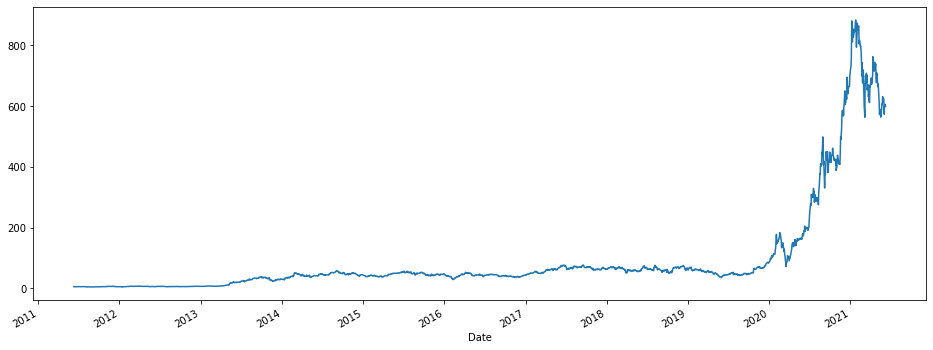

In [13]:
df['Close/Last'].plot(figsize=(16,6))

In [14]:
X  = df[['Open','High','Low','Volume']]
y = df['Close/Last']

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [16]:
X_train.shape

(1887, 4)

In [17]:
X_test.shape

(629, 4)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import math
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print(regressor.coef_)

[-2.84832691e-01  3.76159480e-01  9.22638824e-01  1.96666240e-08]


In [21]:
print(regressor.intercept_)

-0.6938715806062419


In [22]:
predicted=regressor.predict(X_test)
print(X_test)

              Open     High     Low    Volume
Date                                         
2018-02-06  65.042  67.2440  64.700  25400160
2016-06-01  44.296  44.4800  43.378  14911350
2019-02-27  60.356  63.2590  60.110  55720500
2017-09-07  69.196  70.4960  68.690  21175225
2012-05-23   6.112   6.2100   5.900   6101745
...            ...      ...     ...       ...
2018-08-21  62.122  64.9580  61.800  65738850
2016-04-18  50.446  51.6620  50.332  21316230
2017-01-24  50.000  50.9600  49.930  24790720
2015-10-29  42.350  42.7496  42.128   8973715
2014-09-11  56.092  56.9580  55.726  18808085

[629 rows x 4 columns]


In [23]:
predicted.shape

(629,)

In [24]:
dframe=pd.DataFrame(y_test,predicted)

In [25]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [26]:
print(dfr)

            Actual  Predicted
Date                         
2018-02-06  66.794  66.268776
2016-06-01  43.912  43.736236
2019-02-27  62.948  62.465893
2017-09-07  70.122  69.907090
2012-05-23   6.204   5.464751
...            ...        ...
2018-08-21  64.380  64.358260
2016-04-18  50.776  51.228085
2017-01-24  50.922  50.788487
2015-10-29  42.326  42.369542
2014-09-11  56.062  56.539447

[629 rows x 2 columns]


In [27]:
dfr.head(25)

,Actual,Predicted
Date,,
2018-02-06,66.7940,66.268776
2016-06-01,43.9120,43.736236
2019-02-27,62.9480,62.465893
2017-09-07,70.1220,69.907090
2012-05-23,6.2040,5.464751
2017-10-06,71.3760,71.702244
2017-11-20,61.7480,62.211542
2013-12-31,30.0858,30.005729
2015-03-30,38.1140,37.718835


In [28]:
from sklearn import metrics 
print('Results of Linear Regression:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Results of Linear Regression:

Mean Absolute Error: 1.3619558530930744
Mean Squared Error: 16.114254427483925
Root Mean Squared Error: 4.01425639782562


In [29]:
regressor.score(X_test,y_test)*100

99.93479965787955

In [30]:
graph=dfr.head(20)

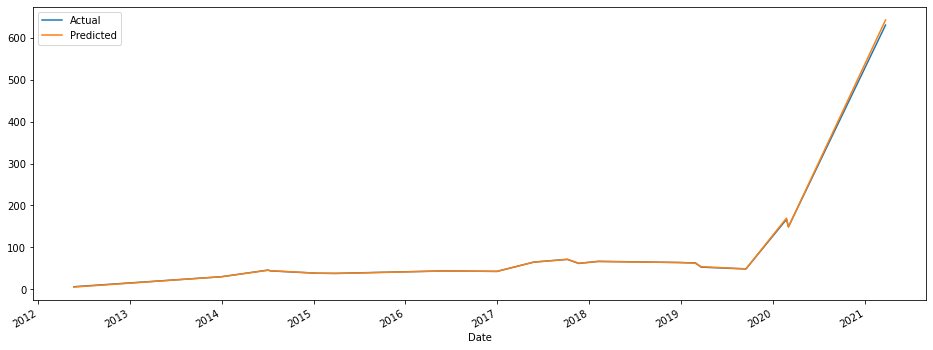

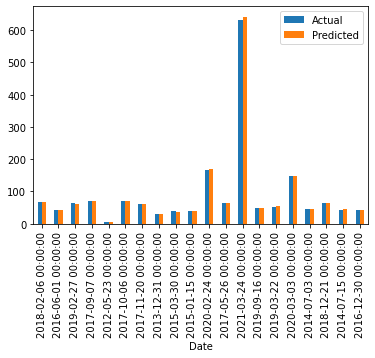

In [31]:
graph.plot(figsize=(16,6))
graph.plot(kind='bar')
